# HW - Natural Language Processing

----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*

----------------------------------------------------

In this project we are going to use the techniques and methods for  text preprocessing. For this purpose, we will focus on solving a tweet classification task.


In [1]:
%matplotlib inline
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Classification of tweets

In this HW we are going to work with a text classification problem. Specifically, we are going to classify tweets into two categories based on what they have been liked.

To start working with this database, run the following cell to load the data file into a dataframe.

In [2]:
tweets_df = pd.read_csv('http://www.tsc.uc3m.es/~vanessa/data_notebooks/nlp/tweets.csv')
tweets_df = tweets_df.drop(columns=['id', 'keyword', 'location']).rename(columns={'text': 'tweet', 'target':'labels'})
tweets_df

,tweet,labels
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


(array([4342., 3271.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

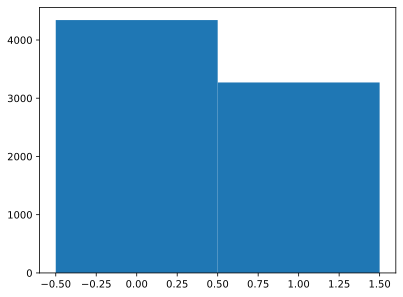

In [3]:
plt.hist(tweets_df.labels.values,bins=[0,1,2],align='left')

## 1.1 Preprocessing of tweets  


Here, we are going to apply the standard preprocessing seen in class for tokenization, cleaning and homogenization of texts. To do so, define a function that implements this process and apply it to the corpus. You can use either standard Python functions, NLTK toolbox  or SpaCY library for this step.

After the preprocessing, check the content of the lemmatized tweets and remove all the entries (tweets) with less than 2 tokens/lemmas.


In [4]:
# SpaCy preprocessing

# Download the model
!python -m spacy download en_core_web_sm

import spacy
nlp_en = spacy.load("en_core_web_sm")

def normalize_Spacy(text):
    text2 = nlp_en(text)
    # change to lower case and remove punctuation
    normalized_text = [w.lemma_.lower() for w in text2 if not w.is_stop
                  and not w.is_punct and (w.is_alpha or w.is_digit)]
    return normalized_text

2023-11-22 19:54:49.794320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 19:54:49.794399: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 19:54:49.794454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 19:54:49.803647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 19:54:51.333753: W tensorflow/compiler/

In [5]:
'''# # NLTK + Python preprocessing
## Load Modules
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer  = WordNetLemmatizer()
stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
punctuation = string.punctuation

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def normalize_en(text, stopwords):
    # pasamos a minúsculas y eliminamos puntuación
    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
    # tokenizamos
    text_tokens = nltk.word_tokenize(text2)
    # eliminamos stop-words
    text_clean = [token for token in  text_tokens if (token not in stopwords)]
    # etiquetamos y lematizamos
    text_tagged = nltk.pos_tag(text_clean)
    normalized_text = [lemmatizer.lemmatize(t, nltk_tag_to_wordnet_tag(tag)) if (nltk_tag_to_wordnet_tag(tag) is not None) else  lemmatizer.lemmatize(t) for (t, tag) in text_tagged]
    return normalized_text


def normalize_es(text, stopwords):
    # pasamos a minúsculas y eliminamos puntuación
    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
    # tokenizamos
    text_tokens = nltk.word_tokenize(text2)
    # eliminamos stop-words
    text_clean = [token for token in  text_tokens if (token not in stopwords)]
    # etiquetamos y lematizamos
    normalized_text = [lemmatizer.lemmatize(t) for t in text_clean]
    return normalized_text

#</SOL>'''

"# # NLTK + Python preprocessing\n## Load Modules\nimport string\nimport nltk\nnltk.download('punkt')\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('averaged_perceptron_tagger')\n\nfrom nltk.stem.wordnet import WordNetLemmatizer\nfrom nltk.corpus import wordnet\n\nlemmatizer  = WordNetLemmatizer()\nstopwords_en = stopwords.words('english')\nstopwords_es = stopwords.words('spanish')\npunctuation = string.punctuation\n\n# function to convert nltk tag to wordnet tag\ndef nltk_tag_to_wordnet_tag(nltk_tag):\n    if nltk_tag.startswith('J'):\n        return wordnet.ADJ\n    elif nltk_tag.startswith('V'):\n        return wordnet.VERB\n    elif nltk_tag.startswith('N'):\n        return wordnet.NOUN\n    elif nltk_tag.startswith('R'):\n        return wordnet.ADV\n    else:\n        return None\n\ndef normalize_en(text, stopwords):\n    # pasamos a minúsculas y eliminamos puntuación\n    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punct

In [6]:
#<SOL>
tweets_df['tweet_clean'] = tweets_df['tweet'].apply(lambda tweet: normalize_Spacy(tweet))
#</SOL>

In [7]:
#Remove tweets with less than 2 tokens!
tweets_df['tweet_len'] = tweets_df['tweet_clean'].apply(lambda x: len(x))
print(len(tweets_df))
tweets_df = tweets_df[tweets_df['tweet_len']>2]
print(len(tweets_df))

7613
7223


In [8]:
tweets_df['tweet'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: tweet, dtype: object

In [9]:
tweets_df['tweet_clean'].head()

0           [deed, reason, earthquake, allah, forgive]
1        [forest, fire, near, la, ronge, sask, canada]
2    [resident, ask, shelter, place, notify, office...
3    [people, receive, wildfire, evacuation, order,...
4    [got, send, photo, ruby, alaska, smoke, wildfi...
Name: tweet_clean, dtype: object

## 1.2 Vectorization of documents

The next step in our pipeline is the vectorization of the tweets we have just processed to obtain their BoW and TF-IDF representation. To do this, start by generating a dictionary to then obtain the BoW representation and then the TF-IDF representation.

For the creation of the dictionary, it is recommended to eliminate the terms that you consider not relevant and, in addition, to limit its size to 2000 tokens. Please justify how you do this process.

In [10]:
#<SOL>
import gensim
from gensim.models import TfidfModel
from gensim.matutils import corpus2csc

def get_vectorization(corpus_tweets):
  # Create dictionary of tokens: the input is the preprocessed corpus
  D = gensim.corpora.Dictionary(corpus_tweets)
  print('Original dictionary length: '+ str(len(D)))

  # These values can be adjusted better
  no_below = 5 #Minimum number of documents to keep a term in the dictionary
  no_above = .75 #Maximum proportion of documents in which a term can appear to be kept in the dictionary
  D.filter_extremes(keep_n=2000, no_below = 5, no_above = .75)

  # Compute BoW
  tweets_bow = [D.doc2bow(doc) for doc in corpus_tweets]

  # fit TFIDF model for all the corpus
  model = TfidfModel(tweets_bow)
  corpus_tfidf = model[tweets_bow]

  # Convert to sparse vector representacion
  n_tokens = len(D)
  print('Final dictionary length: '+ str(len(D)))
  num_docs = len(tweets_bow)
  tweets_bow_sparse = corpus2csc(tweets_bow, num_terms=n_tokens, num_docs=num_docs).T
  tweets_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

  return tweets_bow_sparse, tweets_tfidf_sparse
#</SOL>

In [11]:
#<SOL>
print('Vectorize tweets')
tweets = tweets_df['tweet_clean'].values
tweets_bow, tweets_tfidf = get_vectorization(tweets)


Vectorize tweets
Original dictionary length: 12175
Final dictionary length: 2000


## 1.3 Classification with TF_IDF

Finally, use the follwing classfiers to solve the tweet classification problem:

* Naive Bayes classifier (you can use its standard or complementary version)
* A logistic regression (LR) classifier (use the 'liblinear' solver to avoid convergence problems).
* A PCA + LR classifier.

Compare the performances, in terms of accuracy, when using the TF-IDF representation. To analyze the performance of the model, split each data corpus into a 60%/40% (training/test) partition. To simplify the generation of the train/test partitions for the different schemes, use indexing provided in the following cell.

Finally, compare and comment on the results obtained.  Which approach do you think that works better? Analyze performance vs complexity.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [13]:
# Divide the data into train test partitions
id_tot = np.arange(tweets_tfidf.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)

In [14]:
# Define parameters to CV
param_grid = {
    'C': np.logspace(-3,3,10)
}

# CV with GridSearchCV
grid_clf = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)


In [15]:
Y = tweets_df['labels'].values

### Naive Bayes

In [16]:
# <SOL>
X_train = tweets_tfidf[id_train,:]
X_test = tweets_tfidf[id_test,:]
y_train = Y[id_train]
y_test = Y[id_test]

clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Accuracy Naive Bayes')
acc_en = clf.score(X_test, y_test)
print(acc_en)


# </SOL>

Accuracy Naive Bayes
0.7937716262975778


### LR

In [17]:
#<SOL>
grid_clf.fit(X_train, y_train)

# Test
Acc_train = grid_clf.score(X_train,y_train)
Acc_test = grid_clf.score(X_test,y_test)

print("Acc train {0:.2f}. Acc test {1:.2f}\n".format(Acc_train, Acc_test))
#</SOL>

Acc train 0.89. Acc test 0.78



### LR +PCA

The test performance is 0.79


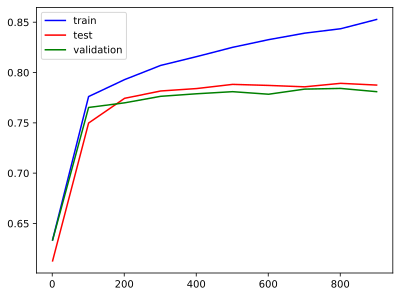

In [18]:
N_feat_max=1000

my_pca = PCA(n_components=N_feat_max).fit(X_train.toarray())
P_train = my_pca.transform(X_train.toarray())
P_test = my_pca.transform(X_test.toarray())

K = P_train.shape[1]


acc_tr = []
acc_val = []
acc_test = []
rang_K = range(1,N_feat_max,100)
for k in rang_K:
  grid_clf.fit(P_train[:,:k+1], y_train)
  acc_tr.append(grid_clf.score(P_train[:,:k+1], y_train))
  acc_test.append(grid_clf.score(P_test[:,:k+1], y_test))
  acc_val.append(grid_clf.best_score_)

plt.figure()
plt.plot(rang_K,acc_tr, "b", label="train")
plt.plot(rang_K,acc_test, "r", label="test")
plt.plot(rang_K,acc_val, "g", label="validation")
plt.legend()

print('The test performance is %2.2f' %acc_test[np.argmax(np.array(acc_val))])

## 1.4 Classification with LSA

Now, from the TF-IDF vectorization, compute the LSA representation of each tweet. Apply a CV to select the optimal dimension of the LSA representation.

The test performance is 0.79


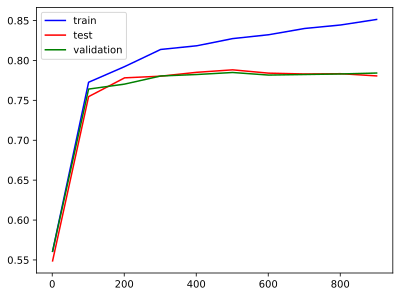

In [19]:
from gensim.matutils import corpus2dense
from scipy.sparse.linalg import svds  # Function to compute the single value descomposition

# Convert TFIDF representacion
corpus_tfidf_dense = tweets_tfidf.toarray().T

N_feat_max=1000

acc_tr = []
acc_val = []
acc_test = []
rang_K = range(1,N_feat_max,100)
for k in rang_K:

  U,S,V = svds(corpus_tfidf_dense, k=k)

  # Compute LSA representation
  G=(np.diag(S)@V).T
  X_train = G[id_train,:]
  X_test = G[id_test,:]
  y_train = Y[id_train]
  y_test = Y[id_test]

  grid_clf.fit(X_train, y_train)
  acc_tr.append(grid_clf.score(X_train, y_train))
  acc_test.append(grid_clf.score(X_test, y_test))
  acc_val.append(grid_clf.best_score_)

plt.figure()
plt.plot(rang_K,acc_tr, "b", label="train")
plt.plot(rang_K,acc_test, "r", label="test")
plt.plot(rang_K,acc_val, "g", label="validation")
plt.legend()

print('The test performance is %2.2f' %acc_test[np.argmax(np.array(acc_val))])

## 1.5 Classification with Word Emdeddings

In this section we are going to obtain the *Word2Vec* representation to obtain an *embedding* of the words/tokens/lemmas in our corpus of *tweets* and then use this representation to predict the class of each *tweet*.

To do so, solve the following sections:

###  1.5.1 *Word2Vec* of the words in the corpus of *tweets*.

Use a pre-trained model (you can load it directly in Gensim or use it from Spacy) and obtain the Word2Vec of the tokens of each tweet.

In [20]:
# SpaCy preprocessing
import spacy
nlp_en = spacy.load("en_core_web_sm")

def w2v_Spacy(text):
    text2 = nlp_en(text)
    # change to lower case and remove punctuation
    w2v_text = np.array([w.vector for w in text2 if not w.is_stop
                  and not w.is_punct and (w.is_alpha or w.is_digit)])
    return w2v_text

In [21]:
tweets_w2v = tweets_df['tweet'].apply(lambda tweet: w2v_Spacy(tweet)).values

### 1.5.2 *Word2Vec* of the *tweets*.

To obtain a unique vector for document, average the word2vec of all the tokens of each tweet.

In [22]:
tweets_w2v_mean = np.stack([np.mean(tweet, axis=0) for tweet in tweets_w2v ])
tweets_w2v_mean.shape

(7223, 96)

1.5.3 Classification with LR

Compute the performance of the LR model using this vectorization

In [23]:
# Divide the data into train test partitions
X_train = tweets_w2v_mean[id_train,:]
X_test = tweets_w2v_mean[id_test,:]
y_train = Y[id_train]
y_test = Y[id_test]

#<SOL>
grid_clf.fit(X_train, y_train)

# Test
Acc_train = grid_clf.score(X_train,y_train)
Acc_test = grid_clf.score(X_test,y_test)

print("Acc train {0:.2f}. Acc test {1:.2f}\n".format(Acc_train, Acc_test))
#</SOL>

Acc train 0.68. Acc test 0.69



## 1.6 Classification with Doc2Vec

Finally, let's use a doc2vec vectorization to analyze its classfication capability. So, train a Doc2Vec model with the tweet's corpus and later analize the performance of the LR classifier.

In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# With TaggedDocument, we create a dictionary at the document level
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tweets_df['tweet_clean'].values)]

model = Doc2Vec(documents, vector_size=150,epochs=10)


In [28]:
tweets_doc2vec = np.array([model.dv.get_vector(idx) for idx in range(len(tweets_df['tweet_clean']))])

# Divide the data into train test partitions
X_train = tweets_doc2vec[id_train,:]
X_test = tweets_doc2vec[id_test,:]
y_train = Y[id_train]
y_test = Y[id_test]



#<SOL>
grid_clf.fit(X_train, y_train)

# Test
Acc_train = grid_clf.score(X_train,y_train)
Acc_test = grid_clf.score(X_test,y_test)

print("Acc train {0:.2f}. Acc test {1:.2f}\n".format(Acc_train, Acc_test))
#</SOL>

Acc train 0.62. Acc test 0.59



## 1.7 Performance analysis

Discuss the performance of embedding-based vectorization and compare them with the results of Section 1.3. Why do you think we failed to improve on the previous schemes?